In [1]:
import tensorflow as tf
import numpy as np

In [2]:
a = np.array([[3,4,5],[7,8,9]])
b = np.array([[1,5],[2,9],[3,6]])

In [3]:
sess = tf.InteractiveSession()

# Placeholders

In [4]:
x = tf.placeholder(dtype=tf.int32)
y = tf.placeholder(dtype=tf.int32)

In [5]:
z = tf.matmul(x,y)

In [6]:
sess.run(z, feed_dict={x:a,y:b})

array([[ 26,  81],
       [ 50, 161]])

# First Neural Network

In [7]:
np.random.seed(101)
tf.set_random_seed(101)

In [8]:
random_a = np.random.uniform(0,100,(5,5))
random_b = np.random.uniform(0,100,(5,1))

In [9]:
random_a

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [10]:
a = tf.placeholder(dtype=tf.float32)
b = tf.placeholder(dtype=tf.float32)

In [11]:
n_features = 10
n_neurons = 3

In [12]:
w = tf.Variable(tf.random_uniform([n_features,n_neurons]))
b = tf.Variable(tf.zeros([n_neurons]))

In [13]:
x = tf.placeholder(dtype=tf.float32, shape=(None, n_features))

In [14]:
xw = tf.matmul(x,w)

In [15]:
z = tf.add(xw,b)

In [16]:
sigmoid = tf.sigmoid(z)

In [17]:
init = tf.global_variables_initializer()

In [18]:
with tf.Session() as sess:
    init.run()
    
    layer = sess.run(sigmoid, feed_dict={x : np.random.random([1,n_features])})
    print(layer)

[[ 0.9821927   0.93713969  0.98685408]]


# Regression with Tensorflow

In [19]:
x = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [20]:
x

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [21]:
y

array([ 0.5420333 ,  1.17575569,  0.85241231,  2.50514314,  4.67005971,
        4.41685654,  6.66701681,  6.69180648,  7.54731409,  9.03483077])

In [22]:
import matplotlib.pyplot as plt

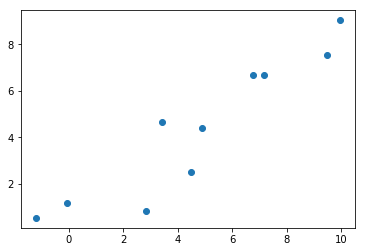

In [23]:
plt.plot(x,y,'o')
plt.show()

In [24]:
np.random.rand(2)

array([ 0.44236813,  0.87758732])

In [25]:
m = tf.Variable(0.39)
c = tf.Variable(0.2)

In [26]:
error = 0
for x_data, y_data in zip(x,y):
    y_pred = m * x_data + c
    
    error += (y - y_pred) ** 2
    

In [27]:
error

<tf.Tensor 'add_19:0' shape=(10,) dtype=float32>

In [28]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [29]:
init = tf.global_variables_initializer()

In [37]:
with tf.Session() as sess:
    sess.run(init)
    
    nb_epoch = 20
    
    for epoch in range(nb_epoch):
        sess.run(train)
        
    slope, intercept = sess.run([m,c])

In [38]:
print(slope,intercept)

-1.18508e+15 -1.62321e+14


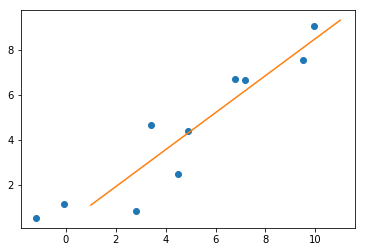

In [39]:
slope = 0.82
intercept = 0.29
new_X = np.linspace(1,11,10)
plt.plot(x,y,'o')
plt.plot(new_X, slope*new_X + intercept)
plt.show()